# Unsupervised Learning Examples
## 1. Principal Component Analysis
## 2. K-Means Clustering

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.datasets import make_blobs
import os
os.environ["OMP_NUM_THREADS"] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

data_dir = "C:/Users/jhtchns2/Box/ACE 592 SAE - Spring 2023/Class_Examples/4_Analysis/"

## 1. PCA Examples

### 1a. Face Detection

An example from the Python Data Science Handbook

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=10)
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Andy Roddick' 'Ann Veneman' 'Ari Fleischer' 'Ariel Sharon'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Bill McBride' 'Bill Simon'
 'Colin Powell' 'Condoleezza Rice' 'David Beckham' 'David Nalbandian'
 'Dick Cheney' 'Donald Rumsfeld' 'Edmund Stoiber' 'Fidel Castro'
 'George HW Bush' 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gordon Brown' 'Hamid Karzai' 'Hans Blix'
 'Harrison Ford' 'Hillary Clinton' 'Hu Jintao' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'James Kelly' 'Jean Chretien'
 'Jeb Bush' 'Jennifer Aniston' 'Jennifer Capriati' 'John Ashcroft'
 'John Bolton' 'John Howard' 'Joschka Fischer' 'Juan Carlos Ferrero'
 'Julianne Moore' 'Junichiro Koizumi' 'Kofi Annan' 'Lance Armstrong'
 'Laura Bush' 'Lindsay Davenport' 'Lleyton Hewitt' 'Megawati Sukarnoputri'
 'Michael Bloomberg' 'Michael Schumacher' 'Mohammad Khatami'
 'Nicole Kidman' 'Pervez Musharraf' 

How can we break these faces down to their most basic components?

In [4]:
faces.data.shape

(3032, 2914)

So we have 3k rows, and a bunch of columns for the pixels.

Text(0.5, 1.0, 'Portion of Variance Explained')

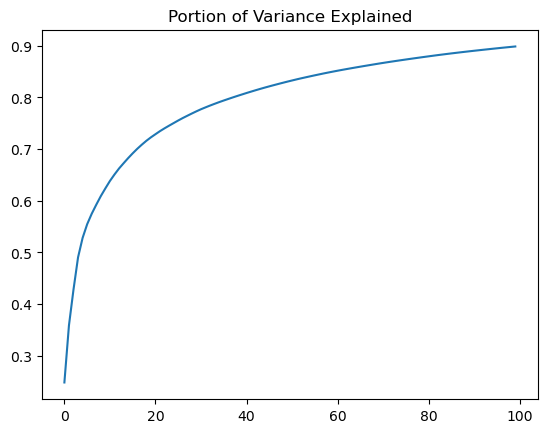

In [25]:
K = 100

pca_model = PCA(K)

pca_model = pca_model.fit(faces.data)

plt.plot(list(range(K)),pca_model.explained_variance_ratio_.cumsum())
plt.title("Portion of Variance Explained")

__How does this inform us about choice of K?__

Text(0.5, 1.0, 'Eigenvalues by Component')

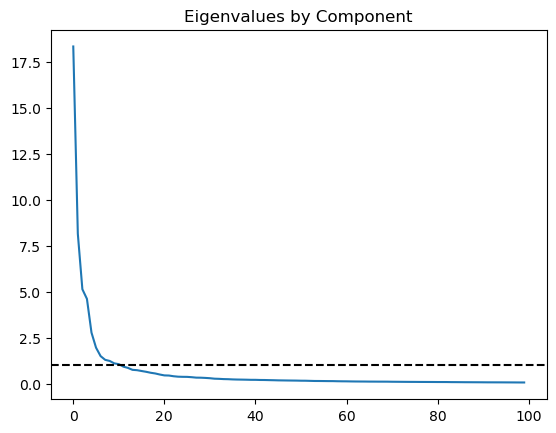

In [26]:
plt.plot(list(range(K)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color="black")
plt.title("Eigenvalues by Component")
#plt.ylim(0,2.5)

__What does this tell us?__

In the case of images, the PCA components can actually be visualized:

In [27]:
pca_model.components_

array([[-0.00943136, -0.01020617, -0.01127543, ..., -0.0096136 ,
        -0.00828494, -0.00684658],
       [-0.01804942, -0.0179365 , -0.01815402, ...,  0.0349841 ,
         0.03293312,  0.03036024],
       [-0.04010393, -0.04152197, -0.04316938, ..., -0.0258805 ,
        -0.02462422, -0.02283077],
       ...,
       [-0.03765459, -0.04088988, -0.02957091, ...,  0.00580769,
        -0.00776824, -0.01630825],
       [-0.00052724,  0.00211531,  0.00596819, ..., -0.01775481,
        -0.02111749, -0.01720902],
       [-0.04665047, -0.03863517, -0.01911651, ...,  0.03369383,
         0.03223881,  0.01824969]], dtype=float32)

These are the coordinates for the plane going through the data. Since each entry is a pixel value, we can reconstruct into an image.

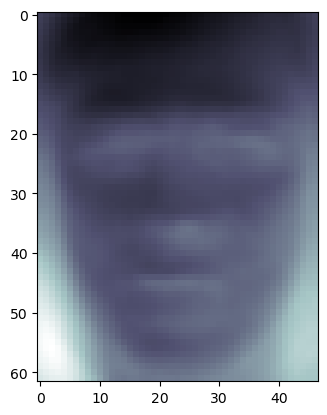

In [28]:
plt.imshow(pca_model.components_[3].reshape(62,47),cmap="bone")

__Why does it look like this you wonder?__

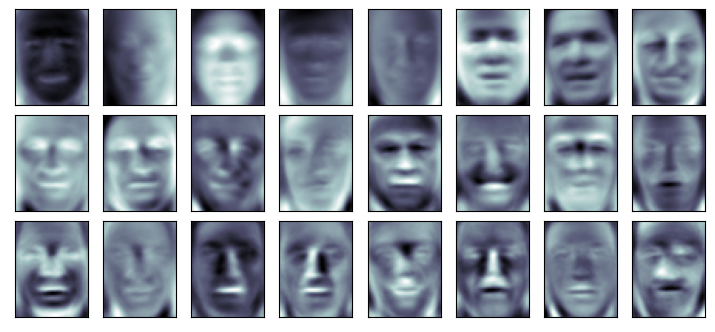

In [29]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_model.components_[i].reshape(62, 47), cmap='bone')

What are these? The are referred to as __"eigenfaces"__

Let's try reconstructing the data

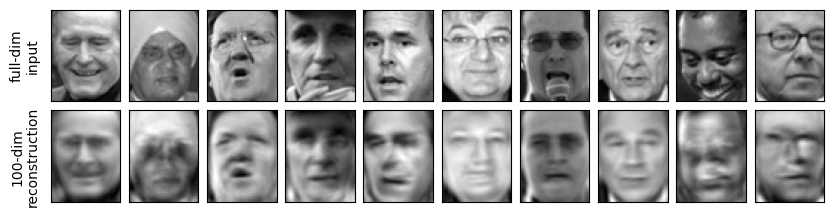

In [31]:
components = pca_model.transform(faces.data)
projected = pca_model.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

So just from 100 components we can make a fairly accurate representation of the faces!

### 1b. Making an Asset Index

Here we will demonstrate making an asset index using an Ethiopia LSMS survery round from 2011. The Living Standard Management Survey (LSMS) is a World Bank used for collecting household-level data.

In [32]:
df = pd.read_csv(data_dir+"asset_data.csv")

df

,household_id,ea_id,rural,pw,saq01,saq02,saq03,saq04,saq05,saq06,saq07,saq08,hh_s10q00,hh_s10q0a,hh_s10q01,hh_s10q02_a,hh_s10q02_b
0,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,1,Kerosene stove,2.0,1.0,2.0
1,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,2,Butance Gas stove,0.0,NaN,NaN
2,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,3,Electric stove,0.0,NaN,NaN
3,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,4,Blanket/Gabi,0.0,NaN,NaN
4,1010101601002,1010101601,1,2236.134521,1,1,1,8,88,16,1,2,5,Mattress and/or bed,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138910,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,31,Axe (Gejera,0.0,NaN,NaN
138911,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,32,Pick Axe (Geso),0.0,NaN,NaN
138912,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,33,Plough (Traditional),0.0,NaN,NaN
138913,15010203102121,15010203102,1,202.670288,15,1,2,8,88,31,2,121,34,Plough (Modern),0.0,NaN,NaN


Data is in long format. Here I will convert to "wide"

In [33]:
assets = df.set_index(['household_id',"ea_id","hh_s10q0a"])["hh_s10q01"]

assets = assets.unstack()
assets

,hh_s10q0a,Axe (Gejera,Bicycle,Biogas stove (pit),Blanket/Gabi,Butance Gas stove,CD/VCD/DVD/Video Deck,Cart (Animal Drawn,Cart (Hand pushed),Electric stove,Fixed line telephone,...,Sewing machine,Shelf for storing goods,Sickle (Machid),Sofa set,Television,Wardrobe,Water pump,Water storage pit,Weaving equipment,Wrist wastch/clock
household_id,ea_id,,,,,,,,,,,,,,,,,,,,,
1010101601002,1010101601,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1010101601017,1010101601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010101601034,1010101601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010101601049,1010101601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010101601064,1010101601,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15010203102072,15010203102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15010203102087,15010203102,1.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15010203102099,15010203102,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To make this "asset index" we can apply PCA to this long list of household assets.

#### Very Important: Always standardize data before using PCA.

In [34]:
assets_std = (assets - assets.mean())/assets.std()


Let's try fitting a model with 3 components.

In [35]:
pca_model = PCA(n_components=3)

pca_model = pca_model.fit(assets_std.fillna(0))

pca_model.transform(assets_std.fillna(0))

array([[ 1.02087442,  2.27139557,  2.09041901],
       [-0.99696621,  0.08838174,  1.57006756],
       [-0.59263516, -1.70427024, -0.41181047],
       ...,
       [-0.55353906, -1.57042942, -0.74300628],
       [-1.06501862, -1.89873789, -0.2866827 ],
       [-1.06501862, -1.89873789, -0.2866827 ]])

So now we have created a 3-d coordinate system out of the several asset variables we have.

How are these components related to our asset measurements?

In [36]:
pca_model.explained_variance_ratio_

array([0.34687576, 0.07889105, 0.06602763])

So the first component explains 34% while the next two explain about 8 to 7%. Let's try more components:

In [37]:
K = 20
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

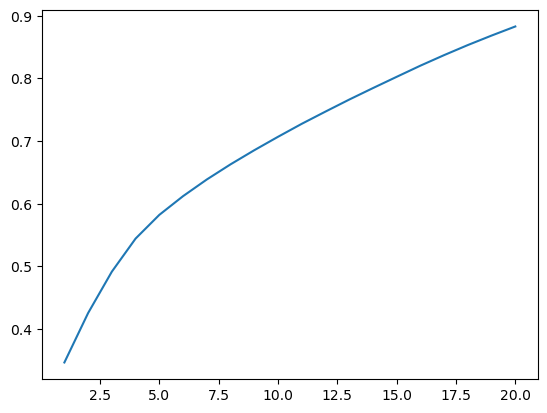

In [38]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,K+1)),pca_model.explained_variance_ratio_.cumsum())

__What does this rule seem to say?__

Let's look at the eigenvalue rule:

In [39]:
pca_model.explained_variance_

array([12.14038922,  2.76112709,  2.31091697,  1.84605459,  1.32391036,
        1.04466642,  0.92961579,  0.84578827,  0.788232  ,  0.74969186,
        0.72470242,  0.68301606,  0.66992449,  0.64177847,  0.62908857,
        0.62334045,  0.58897036,  0.56244572,  0.52970374,  0.50740475])

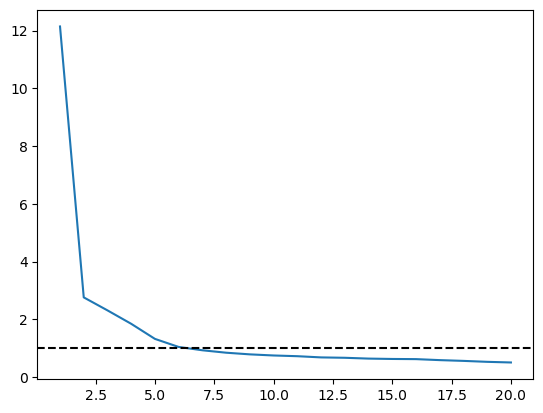

In [40]:
plt.plot(list(range(1,K+1)),pca_model.explained_variance_)
plt.axhline(1,ls="--",color='black')

__So this rule seems to point to what?__

In [41]:
K = 6
pca_model = PCA(n_components=K)
pca_model = pca_model.fit(assets_std.fillna(0))

Now let's look at how it correlates with the variables.

In [42]:
load_scores = pd.DataFrame(pca_model.components_)
load_scores

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.025774,0.219597,0.225090,0.029967,0.197703,0.230394,0.228354,0.224661,0.208746,0.197394,...,0.231250,0.146718,-0.002959,0.183581,0.219671,0.166052,0.159982,0.183652,0.110318,0.088104
1,0.155158,-0.052235,-0.065151,0.398227,-0.063769,0.013237,-0.080634,-0.073663,-0.065750,-0.009942,...,-0.076934,0.130609,0.366064,-0.036580,0.034578,0.035533,-0.028453,-0.015932,-0.047245,0.218709
2,0.106400,-0.048432,0.208713,-0.120555,0.043870,-0.198823,0.010394,-0.016694,0.071794,-0.094868,...,0.011339,-0.075548,0.296037,-0.067340,-0.245350,0.097996,0.136455,0.186856,0.146514,-0.156937
3,0.076682,0.218444,-0.186702,-0.087338,-0.001460,0.122197,0.259627,0.224178,-0.006095,0.118132,...,0.243950,-0.263585,0.176381,0.150811,0.089439,-0.228378,-0.113764,-0.175727,-0.165780,0.005795
4,0.596183,0.004144,0.031646,-0.215592,-0.032459,-0.061325,-0.024859,0.001285,-0.059588,-0.057013,...,-0.038135,-0.039512,-0.173489,-0.035536,-0.052045,0.036051,0.129060,0.046503,-0.009276,0.206024
5,-0.043843,-0.011776,-0.056526,0.011948,-0.092832,0.052892,-0.001521,-0.019544,-0.105509,0.074035,...,-0.013248,-0.055793,0.190106,-0.005408,0.045955,-0.097585,0.367360,-0.052618,-0.116272,-0.048254


In [43]:
pca_model.explained_variance_ratio_

array([0.34687576, 0.07889102, 0.06602756, 0.05274327, 0.03779226,
       0.02980213])

In [44]:
load_scores.columns = assets.columns

In [45]:
load_scores.T.sort_values(0,ascending=False)

,0,1,2,3,4,5
hh_s10q0a,,,,,,
Motorcycle,0.245941,-0.097914,0.018903,0.251459,-0.027874,-0.009965
Satelite Dish,0.243427,-0.014066,-0.138470,0.150957,-0.044463,0.031451
Mitad - electric,0.234217,-0.054981,0.159853,-0.214050,0.011031,-0.032991
Sewing machine,0.231250,-0.076934,0.011339,0.243950,-0.038135,-0.013248
CD/VCD/DVD/Video Deck,0.230394,0.013237,-0.198823,0.122197,-0.061325,0.052892
Cart (Animal Drawn,0.228354,-0.080634,0.010394,0.259627,-0.024859,-0.001521
Biogas stove (pit),0.225090,-0.065151,0.208713,-0.186702,0.031646,-0.056526
Cart (Hand pushed),0.224661,-0.073663,-0.016694,0.224178,0.001285,-0.019544
Refrigerator,0.223143,-0.028949,0.089648,-0.215544,0.014052,-0.011496


So how might we try and interpret these components?

Here is a class I wrote to interface with the model easier.

In [46]:
class PCA_Model:
    def __init__(self,ncomps,data,cols):
        
        self.ncomps = ncomps
        self.cols = cols
        self.data = data
        self.scaled_data = StandardScaler().fit_transform(data[cols].values)
        
    def fit(self):
        self.PCA_obj = PCA(self.ncomps).fit(self.scaled_data)
    
    def describe(self):
        explvar_ = self.PCA_obj.explained_variance_ratio_

        explvar = pd.DataFrame(explvar_[np.newaxis,:]*100,\
                               columns=["Component " + str(x) for x in range(self.ncomps)],\
                               index=["% Explained Variance"])
        
        loadscores_ = self.PCA_obj.components_
        loadscores = pd.DataFrame(loadscores_,\
                                  columns=self.cols,\
                                  index=["Component " + str(x) for x in range(self.ncomps)])
        print("Explains {0:0.2f}% of the variance".format(round(sum(explvar_),2)*100))
        print(explvar)
        print(loadscores)
        return explvar,loadscores
    
    def gen_data(self):
        return self.PCA_obj.transform(self.scaled_data)
    
    def graph(self,alpha=.6):
        self.graphdata = pd.concat([self.data[[color]].reset_index(drop=True),\
                                    pd.DataFrame(self.gen_data()).reset_index(drop=True)],axis=1)
        if self.ncomps==2:
            return self.graphdata.plot(kind="scatter",x=0,y=1,\
                                       c=color,alpha=alpha,colormap=cm)
        else:
            ax = plt.axes(projection='3d')
            ax.scatter3D(self.graphdata[0], \
                         self.graphdata[1], \
                         self.graphdata[2])#, \
                         #c=color,colormap=cm)
    

In [47]:
pca4 = PCA_Model(10,assets.fillna(0),assets.columns)
pca4.fit()
var,load_scores = pca4.describe();

Explains 71.00% of the variance
                      Component 0  Component 1  Component 2  Component 3  \
% Explained Variance    34.686671      7.89023     6.602061     5.274411   

                      Component 4  Component 5  Component 6  Component 7  \
% Explained Variance     3.781219     2.983922     2.653931     2.414938   

                      Component 8  Component 9  
% Explained Variance      2.24269     2.134222  
hh_s10q0a    Axe (Gejera   Bicycle  Biogas stove (pit)  Blanket/Gabi  \
Component 0     0.025776  0.219593            0.225092      0.029982   
Component 1     0.155259 -0.052353           -0.065110      0.398367   
Component 2     0.106168 -0.048322            0.208731     -0.120715   
Component 3     0.076764  0.218293           -0.186608     -0.087668   
Component 4     0.598489  0.000082            0.030866     -0.219656   
Component 5    -0.042864 -0.007242           -0.058466      0.004529   
Component 6    -0.086608 -0.070499           -0.041550     -

## 2. K-means Examples

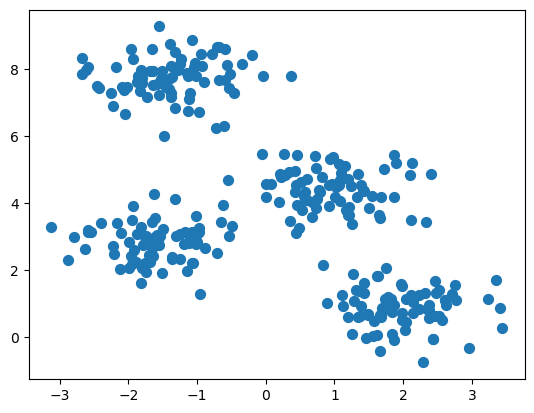

In [48]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

So let's see how K-means will find this rather obviously clustered data.


In [91]:
kmeans = KMeans(n_clusters=2,n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



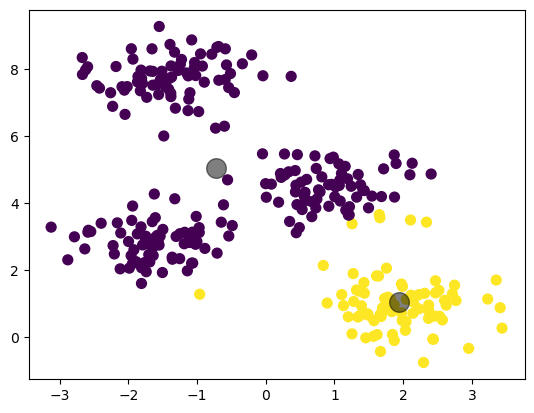

In [92]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

So 2 picks up one but not the others. Let's try again:

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



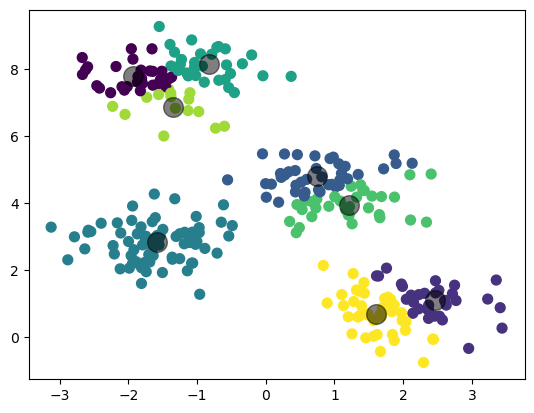

In [93]:
kmeans = KMeans(n_clusters=8,n_init="auto")
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

What would our Heuristics say?

In [94]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K,n_init="auto").fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_


C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows wi

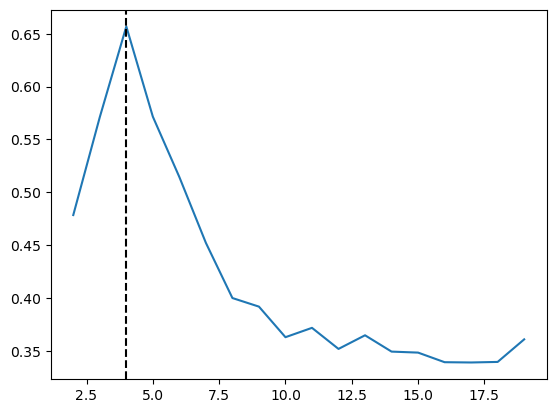

In [95]:
K=20

sil_scores =[score_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(4,color="black",ls="--")

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

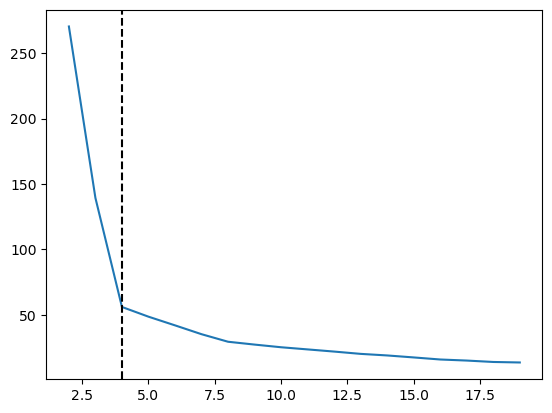

In [54]:
init_scores =[inertia_by_k(X,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(4,color="black",ls="--")

Pretty clear what the optimum is.

Let's try a more connected dataset.

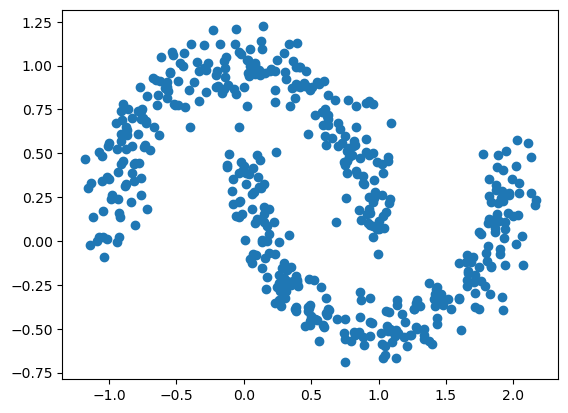

In [55]:
noisy_moons = datasets.make_moons(n_samples=500, noise=.1)

plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1])

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


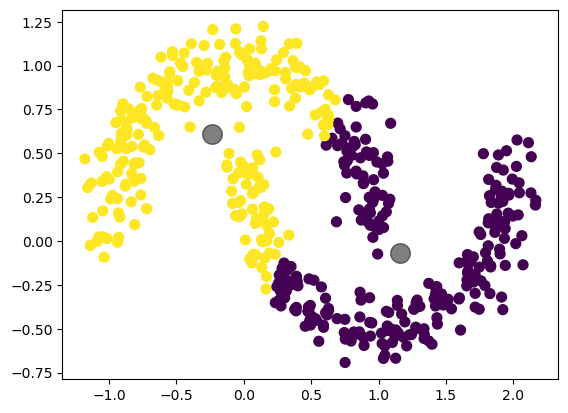

In [56]:
X2 = noisy_moons[0]

kmeans = KMeans(n_clusters=2,n_init="auto")
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Not so good. Let's look at heuristics.

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

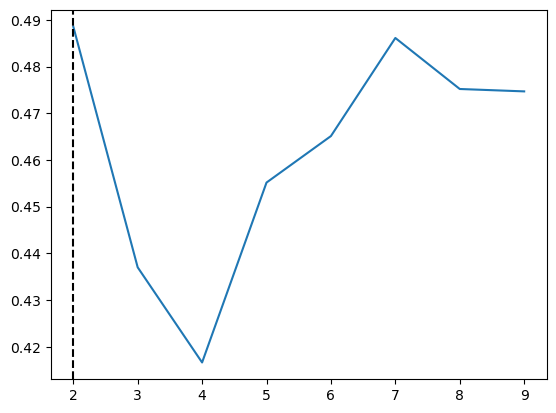

In [57]:
K = 10
sil_scores =[score_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),sil_scores)
plt.axvline(2,color="black",ls="--")

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

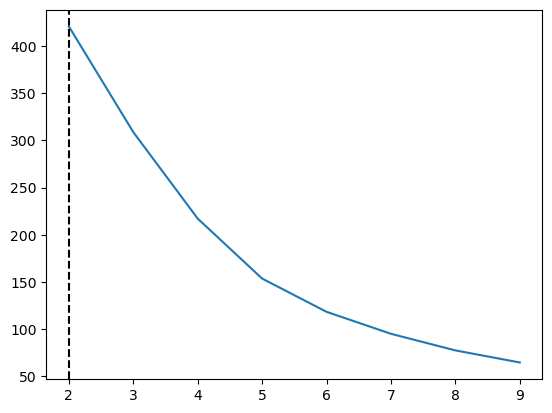

In [58]:
init_scores =[inertia_by_k(X2,i) for i in range(2,K)]
plt.plot(list(range(2,K)),init_scores)
plt.axvline(2,color="black",ls="--")

So in the case of this data, we would not be able to determine any optimal value.

### Consumption Clustering of Households

Going back to our LSMS example, let's look at how households spend their money across food, non-food items, and education.

In [70]:
df = pd.read_csv(data_dir+"consumption_data.csv")
df = df.dropna()
df = df.set_index("household_id")
df2 = df[["nonfood_cons_ann","educ_cons_ann","food_cons_ann"]]
cols_of_interest = ["Non-Food","Education","Food"]
df2.columns =["Non-Food","Education","Food"]

df2.head()

,Non-Food,Education,Food
household_id,,,
1010101601002,4560.0,92.0,10816.000488
1010101601017,4066.0,0.0,8034.000488
1010101601034,1874.0,0.0,2652.000000
1010101601049,2162.0,88.0,8606.000000
1010101601064,3756.0,108.0,14583.126367


In [71]:
px.scatter_3d(df2,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2])

In [72]:
cons = pd.DataFrame(df2[cols_of_interest].values / df[['adulteq']].values)

cons.columns = cols_of_interest
cons.index = df.index
cons_std = (cons - cons.mean())/cons.std()

# Remove outlier
cons_std = cons_std[cons_std['Non-Food']<50]

In [73]:
kmeans = KMeans(5)
kmeans = kmeans.fit(cons_std)
cons_std['cluster'] = kmeans.predict(cons_std)

C:\Users\jhtchns2\.conda\envs\test\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [74]:
px.scatter_3d(cons_std,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2],color='cluster')

### What do you think?

In [77]:
class Kmeans_Model:
    def __init__(self,data,num_clusters):
        self.df = StandardScaler().fit_transform(data)
        self.K = num_clusters
        
    def fit(self):    
        self.model = KMeans(self.K,n_init="auto").fit(self.df)
    
    def predict(self):
        self.prediction = self.model.predict(self.df)
        return self.prediction
    
    def sil_score(self):
        return silhouette_score(self.df,self.model.predict(self.df),sample_size=10000)
    
def score_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.sil_score()

def inertia_by_k(data,K):
    model = Kmeans_Model(data,K)
    model.fit()
    return model.model.inertia_

Let's look at some heuristics:

Text(0.5, 1.0, 'Silhouette Score')

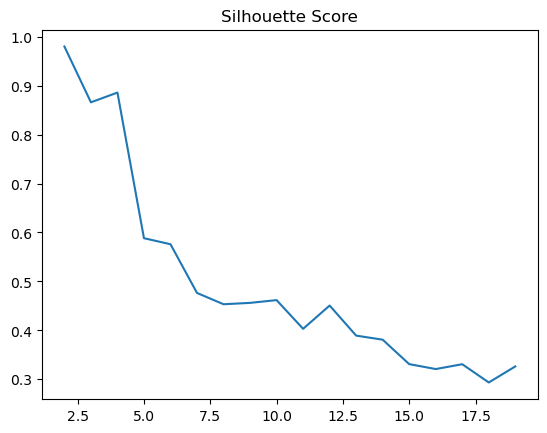

In [78]:
scores = [score_by_k(df2[cols_of_interest],x) for x in range(2,20)]

import matplotlib.pyplot as plt
plt.plot(list(range(2,20)),scores)
plt.title("Silhouette Score")

Text(0.5, 1.0, 'Inertia Score')

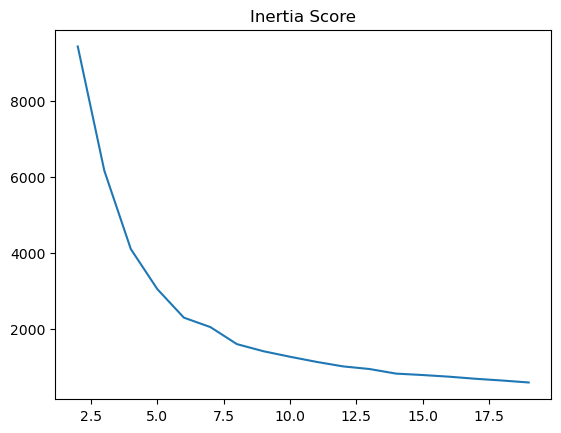

In [80]:
inertia_scores = [inertia_by_k(df2[cols_of_interest],x) for x in range(2,20)]
plt.plot(list(range(2,20)),inertia_scores)
plt.title("Inertia Score")

In [81]:
cons_std.groupby("cluster").mean()

,Non-Food,Education,Food
cluster,,,
0,-0.082524,-0.053884,-0.266994
1,0.057798,-0.110083,8.197637
2,2.282460,26.924023,0.562112
3,0.342340,-0.025886,0.992917
4,0.305566,8.528874,0.611624


In [83]:
K = 5

kmeans = KMeans(K,n_init="auto")
kmeans = kmeans.fit(cons_std)
cons_std['cluster'] = kmeans.predict(cons_std)

px.scatter_3d(cons_std,x=cols_of_interest[0],y=cols_of_interest[1],z=cols_of_interest[2],color='cluster')